<a href="https://colab.research.google.com/github/PhonphailinWS/python_dataviz2023/blob/main/%E0%B8%B8%E0%B8%B8%E0%B8%B8633020375_4_%E0%B8%9E%E0%B8%A3%E0%B9%84%E0%B8%9E%E0%B8%A5%E0%B8%B4%E0%B8%99_%E0%B8%A7%E0%B8%B1%E0%B8%87%E0%B8%AA%E0%B8%B4%E0%B8%99%E0%B8%98%E0%B9%8C%E0%B8%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ใช้ข้อมูลการเลือกตั้งที่ผ่านมา 14 พค 66 ต่อไปนี้ https://docs.google.com/spreadsheets/d/10E-9vetEyquOYiTWq7TzJ4B7_UnpoK0p/edit?usp=share_link&ouid=115237908096743617902&rtpof=true&sd=true

ตอบคำถามต่อไปนี้และแสดงวิธีหาคำตอบต่อไปนี้

## 1. หา สส แบบแบ่งเขตและพรรคที่สังกัด ที่ได้รับคะแนนเลือกตั้งมากที่สุด 10 อันดับแรก (20 คะแนน)

In [38]:
import pandas as pd
import os

In [39]:
from google.colab import drive # เชื่อมบัญชีกับ google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
ss_df = pd.read_excel('/content/drive/MyDrive/DataViz23Data/ectreport66.xlsx')
ss_df

,Sheet,Column,Data Type,Description,Example
0,Candidate_Constituency,mp_app_id,string,รหัสผู้สมัคร ส.ส. เขต,BKK_1_1
1,Candidate_Constituency,mp_app_no,number,หมายเลขผู้สมัคร ส.ส. เขต,1
2,Candidate_Constituency,mp_app_party_id,string,สังกัดพรรคตามรหัสพรรคการเมือง,701
3,Candidate_Constituency,mp_app_name,string,ชื่อผู้สมัคร,นายทดสอบ สามารถ
4,Candidate_Constituency,image_url,string,ลิงก์รูปภาพผู้สมัคร,https://ectdatastorage.blob.core.windows.net/d...
5,Candidate_PartyList,party_no,number,เลขพรรคการเมืองในบัตรเลือกตั้ง ส.ส. บัญชีรายชื่อ,15
6,Candidate_PartyList,list_no,number,ลำดับบัญชีรายชื่อ (มีเพียงเฉพาะบัญชีรายชื่อ),1
7,Candidate_PartyList,name,string,ชื่อผู้สมัคร,นายทดสอบ สามารถ
8,Candidate_PartyList,image_url,string,ลิงก์รูปภาพผู้สมัครดังกล่าว,https://ectdatastorage.blob.core.windows.net/d...
9,Candidate_PM,party_no,number,เลขพรรคการเมืองในบัตรเลือกตั้ง ส.ส. บัญชีรายชื่อ,15


In [5]:
ss_df.head()

,Sheet,Column,Data Type,Description,Example
0,Candidate_Constituency,mp_app_id,string,รหัสผู้สมัคร ส.ส. เขต,BKK_1_1
1,Candidate_Constituency,mp_app_no,number,หมายเลขผู้สมัคร ส.ส. เขต,1
2,Candidate_Constituency,mp_app_party_id,string,สังกัดพรรคตามรหัสพรรคการเมือง,701
3,Candidate_Constituency,mp_app_name,string,ชื่อผู้สมัคร,นายทดสอบ สามารถ
4,Candidate_Constituency,image_url,string,ลิงก์รูปภาพผู้สมัคร,https://ectdatastorage.blob.core.windows.net/d...


In [41]:
import pandas as pd

In [42]:
file_name = '/content/drive/MyDrive/DataViz23Data/ectreport66.xlsx'

In [43]:
sheet_name = 'result_constituencies_Candidate'

In [44]:
data = pd.read_excel(file_name, sheet_name)

In [45]:
data

,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
0,ACR_1,ACR_1_1,9,459,0.43477,706
1,ACR_1,ACR_1_10,1,38275,36.25419,709
2,ACR_1,ACR_1_11,13,126,0.11935,712
3,ACR_1,ACR_1_12,12,127,0.12029,742
4,ACR_1,ACR_1_13,11,212,0.20081,761
...,...,...,...,...,...,...
4776,YST_3,YST_3_5,1,37946,36.30085,709
4777,YST_3,YST_3_6,7,821,0.78541,763
4778,YST_3,YST_3_7,9,531,0.50798,712
4779,YST_3,YST_3_8,11,296,0.28317,769


In [46]:
sorted_data = data.sort_values(by='mp_app_vote', ascending=False)

# แสดง 10 อันดับแรก
top_10 = sorted_data.head(10)
top_10


,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
4301,TRG_2,TRG_2_6,1,63185,60.29103,743
4358,UBN_10,UBN_10_1,1,63127,62.27446,773
960,CMI_4,CMI_4_5,1,62009,54.01387,726
1077,CPM_2,CPM_2_6,1,61414,63.43832,705
3335,RET_5,RET_5_3,1,61288,69.34758,705
2171,NMA_11,NMA_11_4,1,60320,58.86831,705
3910,SPK_5,SPK_5_5,1,60282,50.24547,726
1741,LPN_1,LPN_1_3,1,60127,41.13582,726
1962,NAN_2,NAN_2_1,1,56746,55.10872,705
1579,KSN_1,KSN_1_9,1,56559,59.80965,705


## 2.หา สส แบบแบ่งเขตและพรรคที่สังกัด ที่ได้คะแนนเลือกตั้งน้อยที่สุด N อันดับ โดยที่ N คือเศษที่ได้จากการหาร รหัสนักศึกษา 2 ตัวสุดท้ายด้วย เลข 5 ยกเว้นคนที่เศษเป็น 0 ให้ N=5 ตัวอย่าง เช่น IDxxxxxx13 N = 3 (30 คะแนน)

รหัสนักศึกษาคือ 633020375-4 เศษที่ได้จากการหาร รหัสนักศึกษา 2 ตัวสุดท้ายด้วย เลข 5 คือ 8 เพราะฉะนั้น N=8

In [47]:
sorted_data2 = data.sort_values(by='mp_app_vote', ascending=True)

# แสดง 8 อันดับสุดท้าย
bottom_8 = sorted_data.tail(8)
bottom_8


,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
570,BKK_8,BKK_8_17,19,0,0.0,742
3531,SKA_7,SKA_7_9,11,0,0.0,742
231,BKK_17,BKK_17_6,18,0,0.0,770
4543,UDN_3,UDN_3_13,15,0,0.0,737
4238,STN_2,STN_2_12,13,0,0.0,702
3467,SKA_2,SKA_2_12,12,0,0.0,742
2063,NBI_8,NBI_8_9,11,0,0.0,745
3548,SKA_9,SKA_9_12,13,0,0.0,742


## 3.สร้างตารางคะแนนเลือกตั้งแบบบัญชีรายชื่อที่แต่ละพรรคได้เรียงลำดับจากมากไปหาน้อยในแต่ละภาค โดยใช้การแบ่งภูมิภาคตามการเมืองตามข้อมูลต่อไปนี้ https://th.wikipedia.org/wiki/%E0%B8%A0%E0%B8%B9%E0%B8%A1%E0%B8%B4%E0%B8%A0%E0%B8%B2%E0%B8%84%E0%B8%82%E0%B8%AD%E0%B8%87%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B9%80%E0%B8%97%E0%B8%A8%E0%B9%84%E0%B8%97%E0%B8%A2 (50 คะแนน)
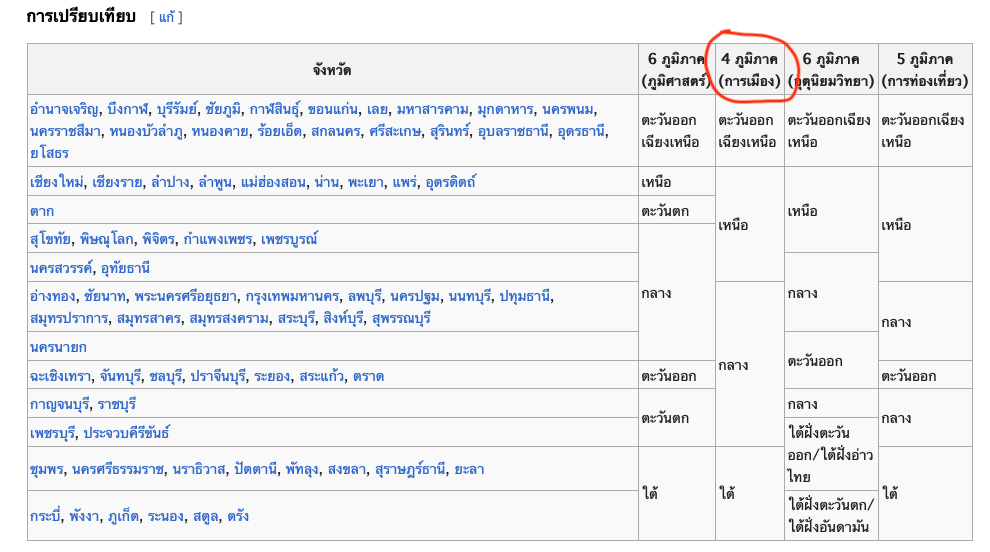

In [48]:
sheet_name2 = 'result_constituencies_PartyList'

In [49]:
data2 = pd.read_excel(file_name, sheet_name2)

In [50]:
data2

,cons_id,party_id,party_list_vote,party_list_vote_percent
0,ACR_1,701,4550,4.30977
1,ACR_1,702,185,0.17523
2,ACR_1,703,67,0.06346
3,ACR_1,705,33576,31.80328
4,ACR_1,706,132,0.12503
...,...,...,...,...
26795,YST_3,780,145,0.13871
26796,YST_3,781,412,0.39414
26797,YST_3,783,17,0.01626
26798,YST_3,784,138,0.13202


In [51]:
data3 = pd.DataFrame({ 'party_id','party_list_vote'})


In [52]:
sorted_data = data.sort_values(by=['party_id','party_list_vote'], ascending=[True, False])


KeyError: ignored

## 4.สร้างตารางสัดส่วนการเลือกพรรคแบบบัญชีรายชื่อในแต่ละเขต ของพรรค อันดับหนึ่ง/อันดับสอง และเรียงลำดับจากมากไปหาน้อย (ในตารางแสดง ชื่อเขต, ..., ชื่อจังหวัด, ชื่อพรรคอันดับหนึ่ง, ชื่อพรรคอันดับสอง, สัดส่วนคะแนน พรรคอันดับหนึ่ง/คะแนนพรรคอันดับสอง)(50 คะแนน)

In [53]:
data_TH = [{'จังหวัด':'อำนาจเจริญ','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'บึงกาฬ','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'บุรีรัมย์','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'ชัยภูมิ','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'กาฬสินธุ์','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'ขอนแก่น','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'เลย','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'มหาสารคาม','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'มุกดาหาร','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'นครพนม','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'นครราชสีมา','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'หนองบัวลำภู','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'หนองคาย','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'ร้อยเอ็ด','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'สกลนคร','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'ศรีสะเกษ','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'สุรินทร์','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'อุบลราชธานี','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'อุดรธานี','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'ยโสธร','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออกเฉียงเหนือ','4 ภูมิภาค (การเมือง)':'ตะวันออกเฉียงเหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออกเฉียงเหนือ','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออกเฉียงเหนือ'},
           {'จังหวัด':'เชียงใหม่','6 ภูมิภาค (ภูมิศาสตร์)':'เหนือ','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'เชียงราย','6 ภูมิภาค (ภูมิศาสตร์)':'เหนือ','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'ลำปาง','6 ภูมิภาค (ภูมิศาสตร์)':'เหนือ','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'ลำพูน','6 ภูมิภาค (ภูมิศาสตร์)':'เหนือ','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'แม่ฮ่องสอน','6 ภูมิภาค (ภูมิศาสตร์)':'เหนือ','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'น่าน','6 ภูมิภาค (ภูมิศาสตร์)':'เหนือ','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'พะเยา','6 ภูมิภาค (ภูมิศาสตร์)':'เหนือ','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'แพร่','6 ภูมิภาค (ภูมิศาสตร์)':'เหนือ','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'อุตรดิตถ์','6 ภูมิภาค (ภูมิศาสตร์)':'เหนือ','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'ตาก','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันตก','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'สุโขทัย','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'พิษณุโลก','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'พิจิตร','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'กำแพงเพชร','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'เพชรบูรณ์','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'เหนือ','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'นครสวรรค์','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'อุทัยธานี','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'เหนือ','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'เหนือ'},
           {'จังหวัด':'อ่างทอง','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'ชัยนาท','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'พระนครศรีอยุธยา','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'กรุงเทพมหานคร','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'ลพบุรี','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'นครปฐม','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'นนทบุรี','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'ปทุมธานี','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'สมุทรปราการ','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'สมุทรสาคร','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'สมุทรสงคราม','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'สระบุรี','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'สิงห์บุรี','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'สุพรรณบุรี','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'นครนายก','6 ภูมิภาค (ภูมิศาสตร์)':'กลาง','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออก','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'ฉะเชิงเทรา','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออก','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออก','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออก'},
           {'จังหวัด':'จันทบุรี','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออก','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออก','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออก'},
           {'จังหวัด':'ชลบุรี','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออก','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออก','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออก'},
           {'จังหวัด':'ปราจีนบุรี','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออก','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออก','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออก'},
           {'จังหวัด':'ระยอง','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออก','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออก','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออก'},
           {'จังหวัด':'สระแก้ว','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออก','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออก','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออก'},
           {'จังหวัด':'ตราด','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันออก','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'ตะวันออก','5 ภูมิภาค (การท่องเที่ยว)':'ตะวันออก'},
           {'จังหวัด':'กาญจนบุรี','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันตก','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'ราชบุรี','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันตก','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'กลาง','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'เพชรบุรี','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันตก','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'ประจวบคีรีขันธ์','6 ภูมิภาค (ภูมิศาสตร์)':'ตะวันตก','4 ภูมิภาค (การเมือง)':'กลาง','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','5 ภูมิภาค (การท่องเที่ยว)':'กลาง'},
           {'จังหวัด':'ชุมพร','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
           {'จังหวัด':'นครศรีธรรมราช','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
           {'จังหวัด':'นราธิวาส','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
           {'จังหวัด':'ปัตตานี','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
           {'จังหวัด':'พัทลุง','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
           {'จังหวัด':'สงขลา','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
           {'จังหวัด':'สุราษฎร์ธานี','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
           {'จังหวัด':'ยะลา','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
           {'จังหวัด':'กระบี่','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
           {'จังหวัด':'พังงา','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
           {'จังหวัด':'ภูเก็ต','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
           {'จังหวัด':'ระนอง','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
           {'จังหวัด':'สตูล','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
           {'จังหวัด':'ตรัง','6 ภูมิภาค (ภูมิศาสตร์)':'ใต้','4 ภูมิภาค (การเมือง)':'ใต้','6 ภูมิภาค (อุตุนิยมวิทยา)':'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','5 ภูมิภาค (การท่องเที่ยว)':'ใต้'},
             ] # สร้าง list ขึ้นมา

In [54]:
data_TH_df = pd.DataFrame(data_TH)
data_TH_df

,จังหวัด,6 ภูมิภาค (ภูมิศาสตร์),4 ภูมิภาค (การเมือง),6 ภูมิภาค (อุตุนิยมวิทยา),5 ภูมิภาค (การท่องเที่ยว)
0,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
1,บึงกาฬ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
2,บุรีรัมย์,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
3,ชัยภูมิ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
4,กาฬสินธุ์,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
...,...,...,...,...,...
72,พังงา,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
73,ภูเก็ต,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
74,ระนอง,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
75,สตูล,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
